# Reaction yield prediction – baseline

Goal: predict reaction yield (%) from simple reaction descriptors using a random forest model.
This is a tiny synthetic dataset to get familiar with ML workflows for reaction modeling.

## 1. Load data

In [1]:
import sys
print(sys.executable)

/Users/tonyodhiambo/Desktop/Comp Chem/reaction-yield-ml/.venv/bin/python


In [2]:
from pathlib import Path
import sys

# add project root (one level up from notebooks/) to Python path
PROJECT_ROOT = Path("..").resolve()
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

print("Project root:", PROJECT_ROOT)


Project root: /Users/tonyodhiambo/Desktop/Comp Chem/reaction-yield-ml


In [3]:
import pandas as pd
from pathlib import Path
from src.features import load_reaction_data, encode_features

df = load_reaction_data(Path("/Users/tonyodhiambo/Desktop/Comp Chem/reaction-yield-ml/data/reactions_small.csv"))
df.head()

,substrate,base,solvent,temperature_C,time_h,yield_percent
0,aryl_bromide_A,K2CO3,DMF,100,12,78
1,aryl_bromide_B,NaOtBu,THF,80,8,65
2,aryl_bromide_C,K3PO4,DMF,110,16,92
3,aryl_bromide_A,NaOtBu,THF,75,10,55
4,aryl_bromide_D,K2CO3,DMAc,95,14,70


## 2. Explore features and target

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   substrate      5 non-null      object
 1   base           5 non-null      object
 2   solvent        5 non-null      object
 3   temperature_C  5 non-null      int64 
 4   time_h         5 non-null      int64 
 5   yield_percent  5 non-null      int64 
dtypes: int64(3), object(3)
memory usage: 372.0+ bytes


In [5]:
df.describe()

,temperature_C,time_h,yield_percent
count,5.00000,5.000000,5.000000
mean,92.00000,12.000000,72.000000
std,14.40486,3.162278,13.946326
min,75.00000,8.000000,55.000000
25%,80.00000,10.000000,65.000000
50%,95.00000,12.000000,70.000000
75%,100.00000,14.000000,78.000000
max,110.00000,16.000000,92.000000


<Axes: >

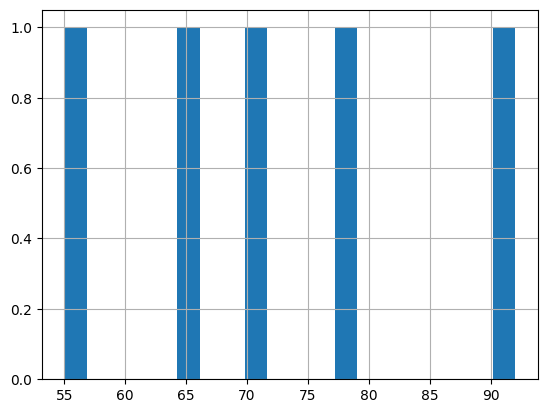

In [6]:
df["yield_percent"].hist(bins=20)

In [7]:
df.isna().mean().sort_values(ascending=False)

substrate        0.0
base             0.0
solvent          0.0
temperature_C    0.0
time_h           0.0
yield_percent    0.0
dtype: float64

In [8]:
df.corr(numeric_only=True)["yield_percent"].sort_values(ascending=False).head(15)

yield_percent    1.000000
temperature_C    0.964435
time_h           0.782275
Name: yield_percent, dtype: float64

## 3. Train baseline model

In [9]:
from src.train_baseline import train_and_evaluate

model, mae, r2 = train_and_evaluate(Path("/Users/tonyodhiambo/Desktop/Comp Chem/reaction-yield-ml/data/reactions_small.csv"))
mae, r2

/Users/tonyodhiambo/Desktop/Comp Chem/reaction-yield-ml/.venv/lib/python3.13/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


(2.645000000000003, nan)

## 4. feature importance

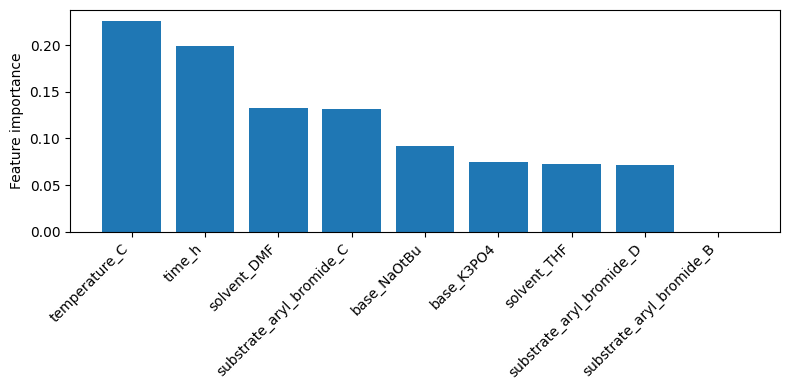

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# feature names after preprocessing (rough hack)
df = pd.read_csv("/Users/tonyodhiambo/Desktop/Comp Chem/reaction-yield-ml/data/reactions_small.csv")
numeric_cols = ["temperature_C", "time_h"]
cat_cols = [c for c in df.columns if c not in numeric_cols + ["yield_percent"]]

# one-hot expands cat cols; just label them generically
X, y = encode_features(df)
feature_names = X.columns.tolist()

importances = model.feature_importances_
idx = np.argsort(importances)[::-1]  # sort from most to least important

plt.figure(figsize=(8, 4))
plt.bar(range(len(importances)), importances[idx])
plt.xticks(range(len(importances)), np.array(feature_names)[idx], rotation=45, ha="right")
plt.ylabel("Feature importance")
plt.tight_layout()
plt.show()
